In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [11]:
wine_df=pd.read_csv("https://github.com/dsrscientist/DSData/raw/master/winequality-red.csv")
print("Dataset Shape:",wine_df.shape)
#CHECKING DATA DESTRIBUTION
wine_df.head()

Dataset Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
#INFO ABOUT DATA COLUMNS
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# PLOTING GRAPHS FOR BETTER INSIGHT TO DATA DESTRIBUTION

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

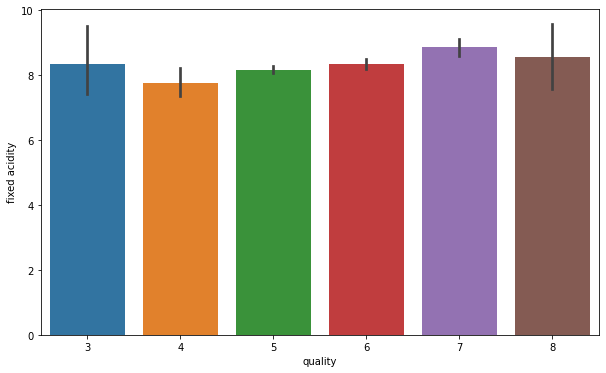

In [13]:
#fixed acidity v/s quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

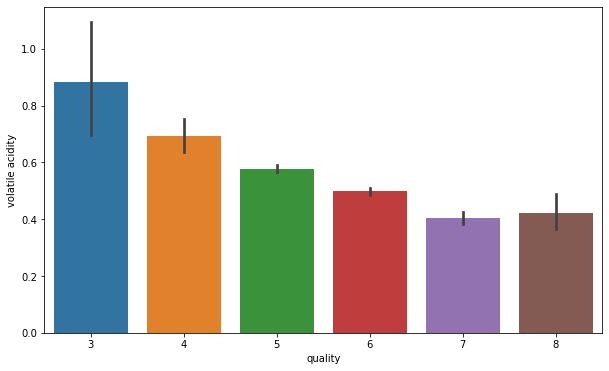

In [14]:
#volatile acidity v/s quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

There is a downward trend in the above plot

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

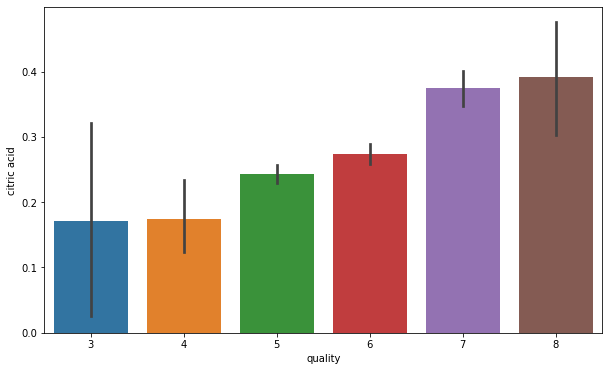

In [15]:
#citric acid v/s quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=wine_df)

There is a increasing trend in the above plot

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

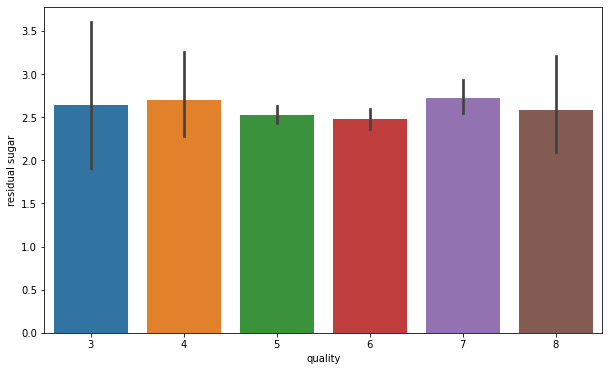

In [16]:
#Residual sugar v/s quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual sugar',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

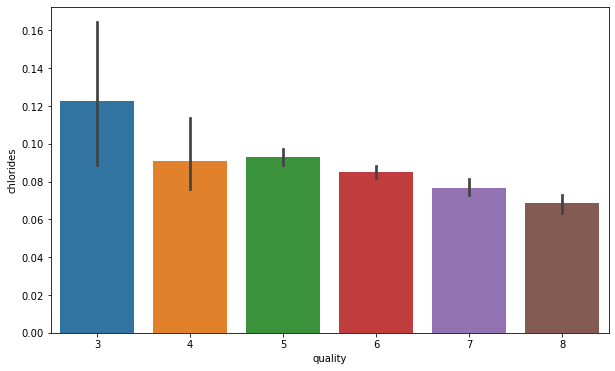

In [17]:
#Chlorides v/s quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=wine_df)

There is a decreasing trend in the above plot

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

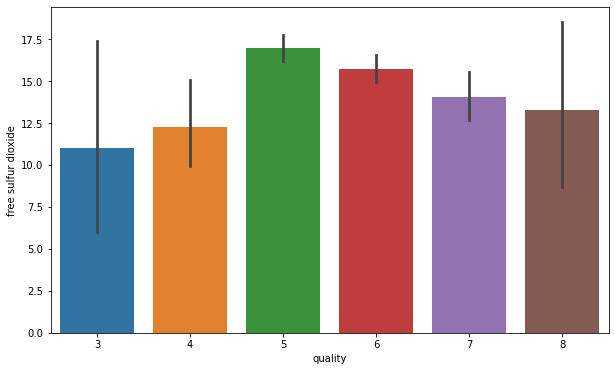

In [18]:
#free sulfur dioxide v/s quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

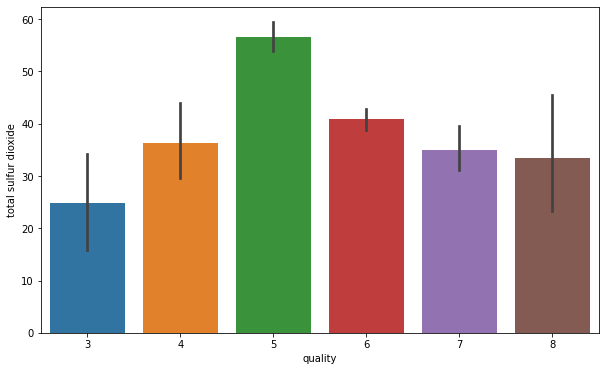

In [19]:
#total sulfur dioxide v/s quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

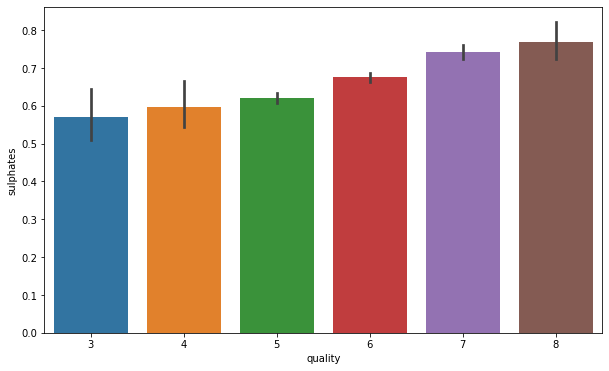

In [20]:
#sulphates v/s quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates',data=wine_df)

There is a increasing trend in the above plot

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

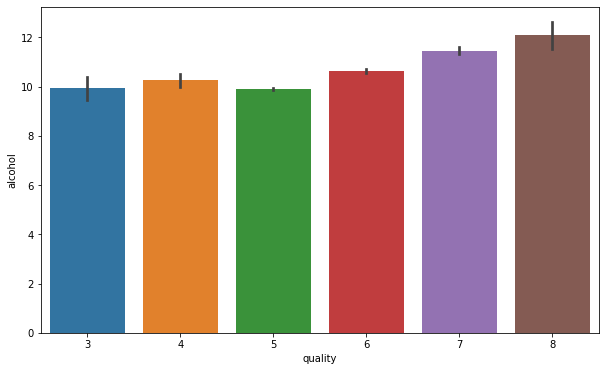

In [21]:
#alcohal v/s quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

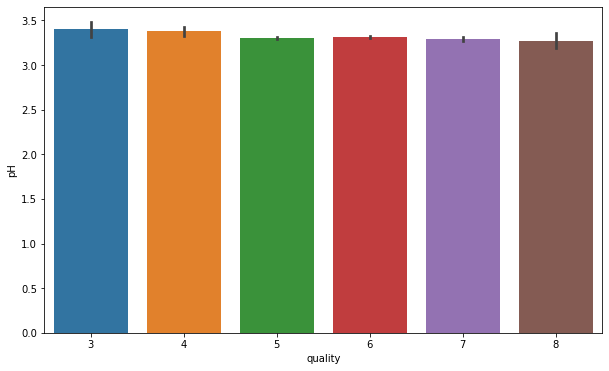

In [22]:
#pH v/s quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='pH',data=wine_df)

# PRE-PROCESSING DATA FOR ML ALGORITHM

In [23]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [24]:
#classifying the wine quality as good or bad based on its quality
#'Bad'or 0 if quality of wine lies in the range(3,6){inclusive}
#'Good'or 1 if quality of wine lies in the range(7,8){inclusive}
wine_df['quality']=wine_df['quality'].apply(lambda x:1 if x>6.5 else 0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

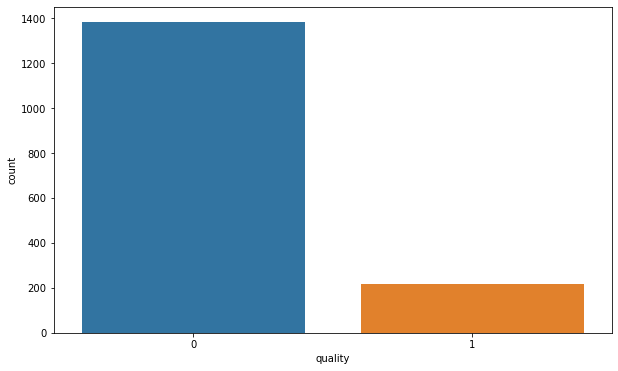

In [25]:
print(wine_df['quality'].value_counts())
fig=plt.figure(figsize=(10,6))
sns.countplot(wine_df['quality'])

we concluded from the above plot there is more number of bad wines

In [26]:
#separating to Dependent and Independent variables
x=wine_df.iloc[:,:-1].values
y=wine_df.iloc[:,-1].values

In [27]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [28]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
#splitting into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x-train shape:",x_train.shape)
print("x-test shape:",x_test.shape)
print("y-train shape:",y_train.shape)
print("y-test shape:",y_test.shape)

x-train shape: (1279, 11)
x-test shape: (320, 11)
y-train shape: (1279,)
y-test shape: (320,)


In [30]:
#applying standard scaling to the dataset to scale all the field values to same(approx.)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# CREATING ML ALGORITHMS

(1)RANDOM FOREST CLASSIFIER

In [31]:
#Creating Random Forest Classifier Instance
rf_regressor=RandomForestClassifier(n_estimators=100)
#Fitting the classifier with training data
rf_regressor.fit(x_train,y_train)
#predicting using classifier
y_pred=rf_regressor.predict(x_test)

[[263  10]
 [ 28  19]]


<Figure size 720x432 with 0 Axes>

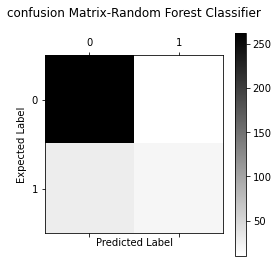

In [32]:
#confusion Matrix using the Random Forest Classifier
cm=confusion_matrix(y_test,y_pred)
print(cm)
#Matplot for confusion Matrix of Random Forest Classifier
fig=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation='nearest')
plt.title("confusion Matrix-Random Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [33]:
print("Total Prediction:",len(y_pred))
print("correct Prediction:",sum(y_pred==y_test))
print("Incorrect Prediction:",sum(y_pred!=y_test))
print("Accuracy:",sum(y_pred==y_test)*100/len(y_pred),"%")

Total Prediction: 320
correct Prediction: 282
Incorrect Prediction: 38
Accuracy: 88.125 %


# SUPPORT VECTOR CLASSIFIER

In [34]:
#Support vector classifier Instance
svc_regressor=SVC()
#Fitting train data to support vector classifier
svc_regressor.fit(x_train,y_train)
#predicting using support vector classifier
y_pred=svc_regressor.predict(x_test)

[[268   5]
 [ 35  12]]


<Figure size 720x432 with 0 Axes>

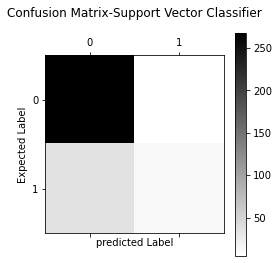

In [35]:
#confusion matrix using the Support Vector Classifier
cm=confusion_matrix(y_test,y_pred)
print(cm)
#Matplot for confusion matrix of Support Vector Classifier
fig=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation='nearest')
plt.title("Confusion Matrix-Support Vector Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("predicted Label")
plt.show()

In [36]:
print("Total Prediction:",len(y_pred))
print("Correct Prediction:",sum(y_pred==y_test))
print("Incorrect Prediction:",sum(y_pred!=y_test))
print("Accuracy:",sum(y_pred==y_test)*100/len(y_pred),"%")

Total Prediction: 320
Correct Prediction: 280
Incorrect Prediction: 40
Accuracy: 87.5 %


# TUNING ML ALGORITHM

(1) SVC

In [39]:
#Finding parameters for svc models
param={
       'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
       'kernel':['linear','rbf'],
       'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc=GridSearchCV(svc_regressor,param_grid=param,scoring='accuracy',cv=10)

In [40]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [41]:
print("Best Parameters for SVC:",grid_svc.best_params_)

Best Parameters for SVC: {'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}


confusion Matrix:
 [[271   2]
 [ 31  16]]


<Figure size 720x432 with 0 Axes>

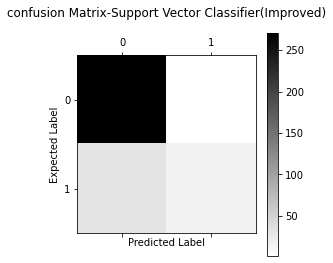

In [43]:
svc_regressor2=SVC(C=1.2,gamma=0.9,kernel='rbf')
svc_regressor2.fit(x_train,y_train)
y_pred_svc=svc_regressor2.predict(x_test)
cm_svc2=confusion_matrix(y_test,y_pred_svc)
print("confusion Matrix:\n",cm_svc2)
fig=plt.figure(figsize=(10,6))
plt.matshow(cm_svc2,cmap=plt.cm.binary,interpolation='nearest')
plt.title("confusion Matrix-Support Vector Classifier(Improved)\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [45]:
print("Total Predictions:",len(y_pred_svc))
print("correct Prediction:",sum(y_pred_svc==y_test))
print("Incorrect Prediction:",sum(y_pred_svc!=y_test))
print("Accuracy:",sum(y_pred_svc==y_test)*100/len(y_pred_svc),"%")

Total Predictions: 320
correct Prediction: 287
Incorrect Prediction: 33
Accuracy: 89.6875 %


(2) RANDOM FOREST CLASSIFIER

In [49]:
rf_eval=cross_val_score(estimator=rf_regressor,X=x_train,y=y_train,cv=10)
rf_eval.mean()

0.9124507874015748

Result:1-We created ML classifier for classifying wine as good or bad.
2-The dataset contained 1599 records and 12 fields
3-Random Forest Classifier classified with an accuracy of 88%(approx) and 91%(approx) after tuning.
4-svc classifier with an accuracy of 87%(approx.) and 89%(approx.) after tuning.